In [14]:
% matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

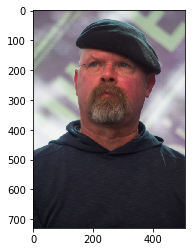

In [15]:
img = cv2.imread('ps0_python/output/ps0-1-a-1.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)


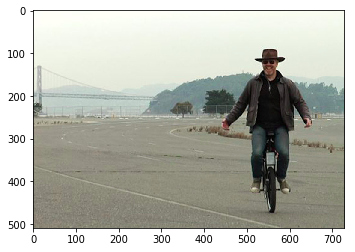

In [48]:
img2 = cv2.imread('ps0_python/output/ps0-1-a-2.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.imshow(img2)


In [50]:
imred = img[:, :, 0]
imgreen = img[:, :, 1]
imblue = img[:, :, 2]
imred2 = img2[:, :, 0]
imgreen2 = img2[:, :, 1]
imblue2 = img2[:, :, 2]
imred.shape

(729, 509)

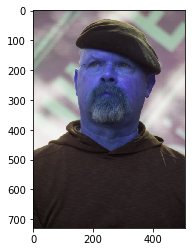

In [94]:
# Swap the red and blue pixels of image 1
imreversed = np.stack((imblue, imgreen, imred), 2)
plt.imshow(imreversed)


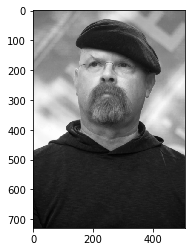

In [54]:
# Create a monochrome image (img1_red) by selecting the red channel of image 1
plt.imshow(imred, cmap="gray")

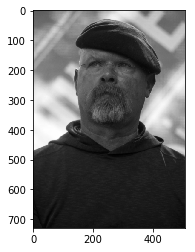

In [56]:
# Create a monochrome image (img1_green) by selecting the green channel of image 1
plt.imshow(imgreen, cmap="gray")

In [37]:
imgreen.shape

(729, 509)

In [38]:
729/2-50, 509/2-50

(314.5, 204.5)

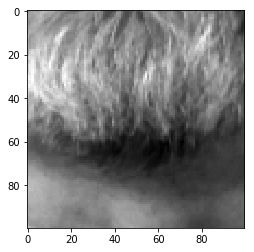

In [40]:
plt.imshow(imred[314:414, 204:304], cmap="gray")

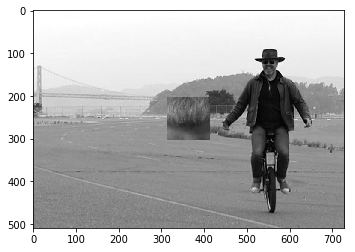

In [57]:
# Take the inner center square region of 100x100 pixels of monochrome version of image 1 
# and insert them into the center of monochrome version of image 2
combined = imgreen2.copy()
combined[204:304, 314:414] = imred[314:414, 204:304]
plt.imshow(combined, cmap="gray")

In [45]:
# What is the min and max of the pixel values of img1_green?
# What is the mean? What is the standard deviation?

print(imgreen.min())
print(imgreen.max())
print(imgreen.mean())
print(imgreen.std())

6
245
88.3284069196
67.508123291


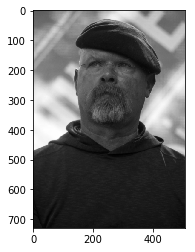

In [47]:
# Subtract the mean from all pixels, then divide by standard deviation, then multiply by 10
# (if your image is 0 to 255) or by 0.05 (if your image ranges from 0.0 to 1.0). Now add the mean back in.
x = (imgreen - imgreen.mean()) / imgreen.std() * 10 + imgreen.mean()
plt.imshow(x, cmap="gray")

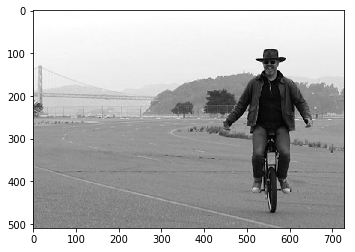

In [71]:
# Shift img1_green to the left by 2 pixels.
to_left = np.roll(imgreen2, 2, axis=1)
plt.imshow(to_left, cmap="gray")

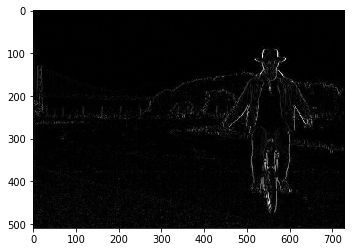

In [79]:
# Subtract the shifted version of img1_green from the original, and save the difference image.
diff = to_left.astype("int16") - imgreen2.astype("int16")
diff = np.abs(diff).astype("uint8")
plt.imshow(diff, cmap="gray")


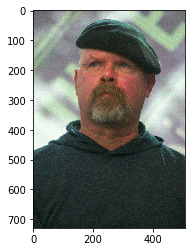

In [131]:
# Take the original colored image (image 1) and start adding Gaussian noise to the pixels 
# in the green channel. Increase sigma until the noise is somewhat visible.  
noise = np.random.randn(*img.shape[:2]) * 15
noise = np.abs(noise).astype("uint8")
noisy_g = cv2.add(imgreen, noise)
imnoisyg = np.stack((imred, noisy_g, imblue), 2)
plt.imshow(imnoisyg)

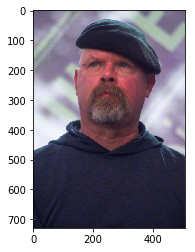

In [132]:
# Now, instead add that amount of noise to the blue channel.  
noisy_b = cv2.add(imblue, noise)
imnoisyb = np.stack((imred, imgreen, noisy_b), 2)
plt.imshow(imnoisyb)

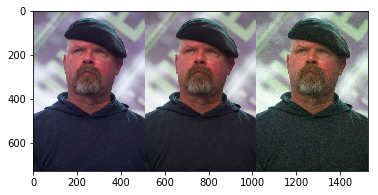

In [136]:
plt.imshow(np.concatenate((imnoisyb, img, imnoisyg), 1))